 The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline


In [2]:
df= pd.read_csv("creditcard.csv", sep= ',')

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


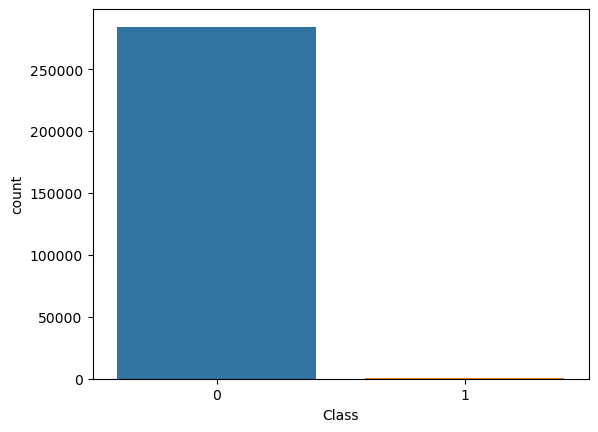

In [6]:
sns.countplot(df['Class'])
plt.show()

seeems like the data is imbalanced so we need imbalanced learn package

In [10]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.metrics import classification_report_imbalanced

In [11]:
#let's do some EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [12]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [13]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


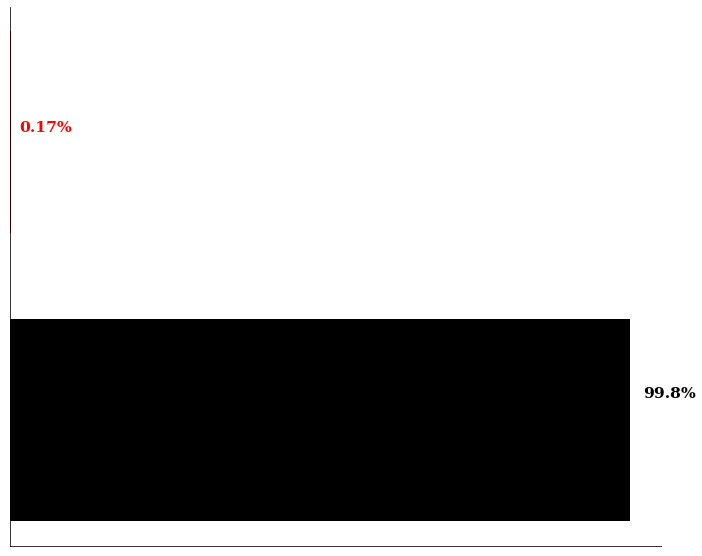

In [26]:
#let's visualize classes
d1= pd.DataFrame(df.groupby(['Class'])['Class'].count())
fig,axes=plt.subplots(figsize= (12,10), dpi= 70)
axes.barh([0],d1.Class[0], height= 0.7, color= 'black')
plt.text(290000,0.08, '99.8%',{'fontname':'Serif','weight':'bold' ,'size':'16','color':'black'})
axes.barh([1], d1.Class[1] ,height= 0.7, color= 'red')
plt.text(3900,1, '0.17%',{'fontname':'Serif', 'weight':'bold','size':'16','color':'red'})

axes.axes.get_xaxis().set_visible(False)
axes.axes.get_yaxis().set_visible(False)
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


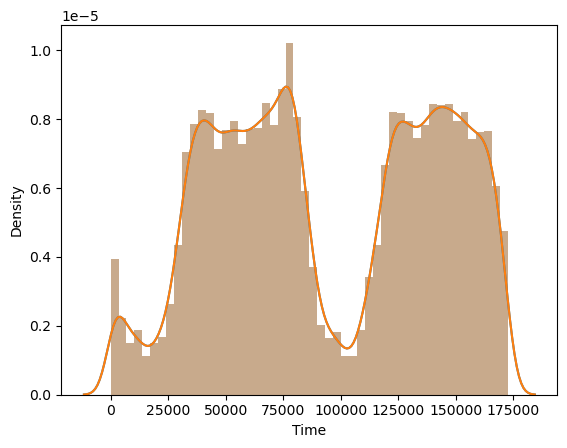

In [28]:
#let's do it without sampling and with oversampling
sns.distplot(df['Time'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


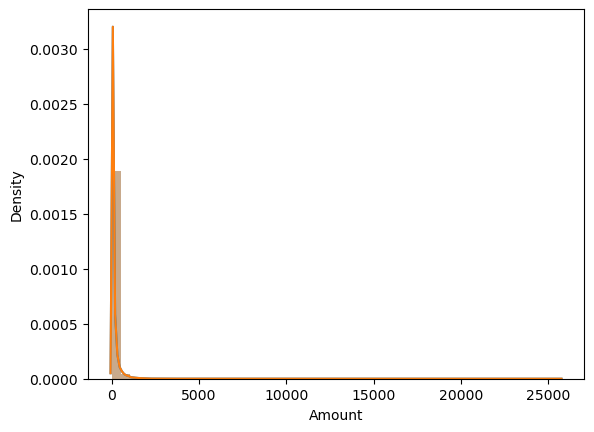

In [30]:
sns.distplot(df['Amount'])
plt.show()

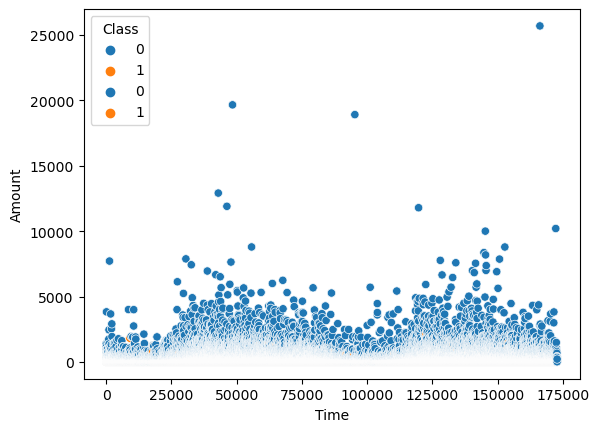

In [32]:
sns.scatterplot(x= 'Time', y='Amount', hue= 'Class', data = df)
plt.show()

looks like there are outliers

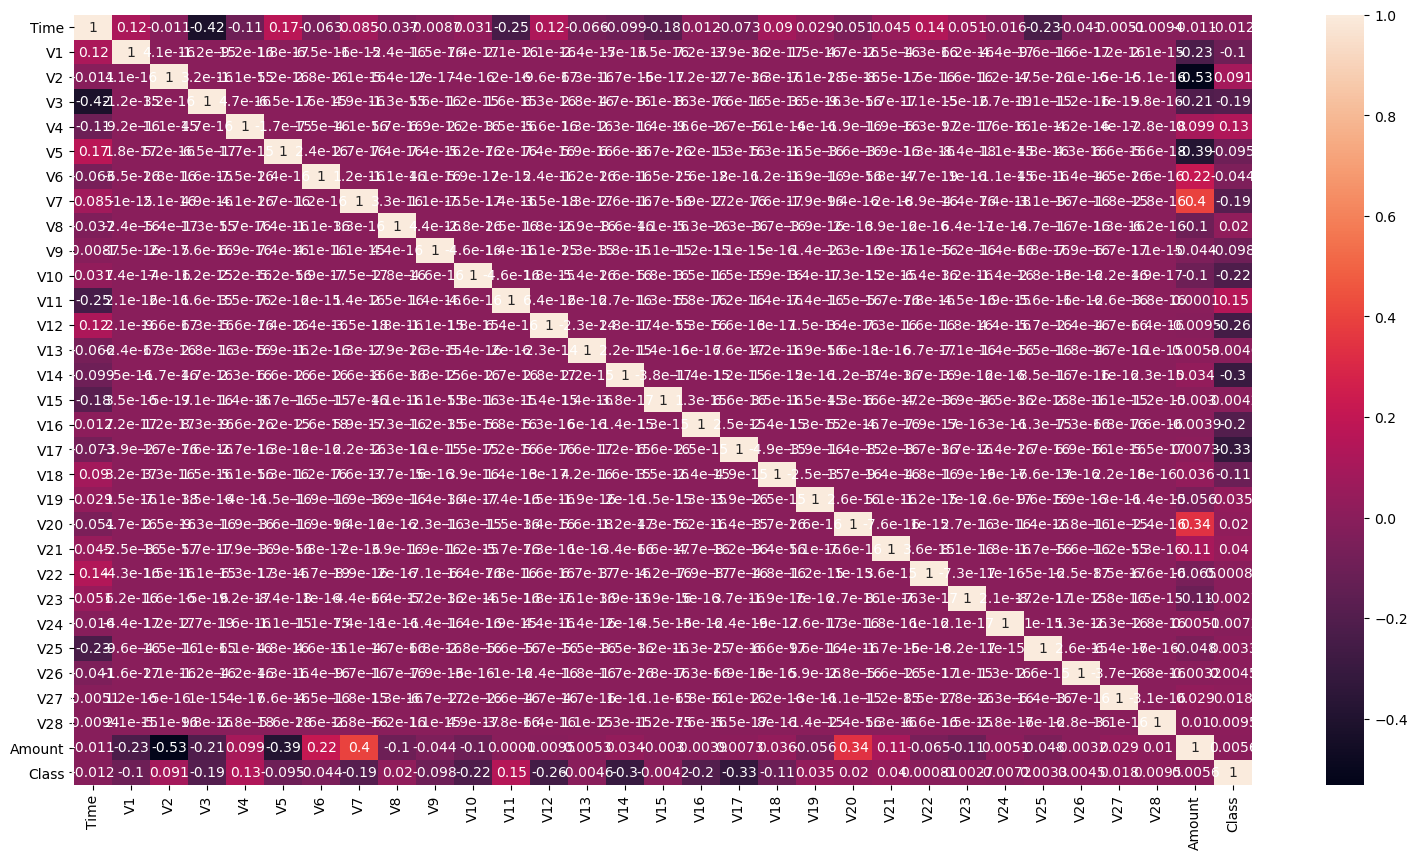

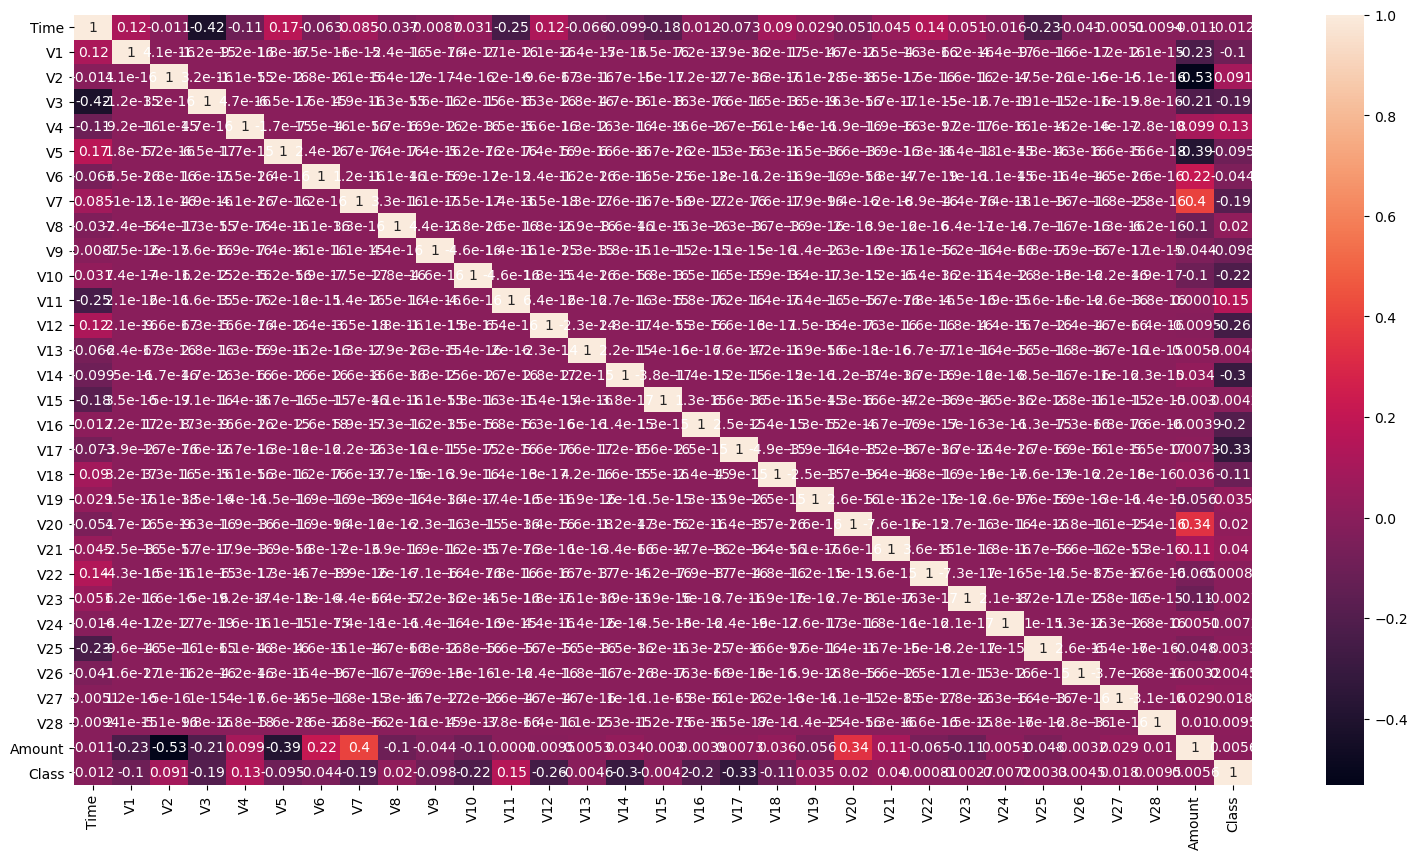

In [35]:
#let's checl correrlation now
plt.figure(figsize= (19,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [37]:
#becuasue of outliers let;s scale it
from sklearn.preprocessing import RobustScaler

rbst= RobustScaler()



In [39]:
df['Amount']= rbst.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time']= rbst.fit_transform(df['Time'].values.reshape(-1,1))

In [40]:
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

### splitting training and testing set

In [41]:
X= df.drop('Class', axis =1)
Y= df.Class.values

In [42]:
Y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.034951,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653
284803,1.034963,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986
284804,1.034975,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096
284805,1.034975,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680


##### importing relevant libraries


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as Knn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier
import xgboost as xgb
import lightgbm as lgb


from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report , confusion_matrix
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_test,y_train,y_test= train_test_split(X,Y,test_size= 0.2, random_state= 10)

In [99]:
# a fucntion to see things easi;ly
def predict(model,X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    print(confusion_matrix(y_test,preds))
    print(classification_report(y_test,preds))
    print(roc_auc_score(y_test, preds))
   
    
    return accuracy_score(y_test,preds)


In [101]:
# a fucntion to see things easi;ly
def predict2(model,X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    print(confusion_matrix(y_test,preds))
    print(classification_report(y_test,preds))
    print("roc_score",roc_auc_score(y_test, preds))
    fig, axes = plt.subplots(1,2,figsize=(27,12))
    
    axes[0].set_title("Confusion Matrix")
    sns.heatmap(confusion_matrix(y_test,preds),annot=True,fmt='0.0f',ax=axes[0])

    tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': model.feature_importances_})
    tmp = tmp.sort_values(by='Feature importance',ascending=False)
    s = sns.barplot(x='Feature',y='Feature importance',data=tmp,color='red',ax=axes[1])
    axes[1].set_title("Feature Importance")
    plt.show()
    return accuracy_score(y_test,preds)


In [102]:
predict(LogisticRegression(), X_train, X_test, y_train, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[56859     9]
 [   31    63]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.88      0.67      0.76        94

    accuracy                           1.00     56962
   macro avg       0.94      0.84      0.88     56962
weighted avg       1.00      1.00      1.00     56962

0.8350272523604495


0.9992977774656788

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:49:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[[56866     2]
 [   17    77]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.97      0.82      0.89        94

    accuracy                           1.00     56962
   macro avg       0.99      0.91      0.95     56962
weighted avg       1.00      1.00      1.00     56962

0.9095568835032677


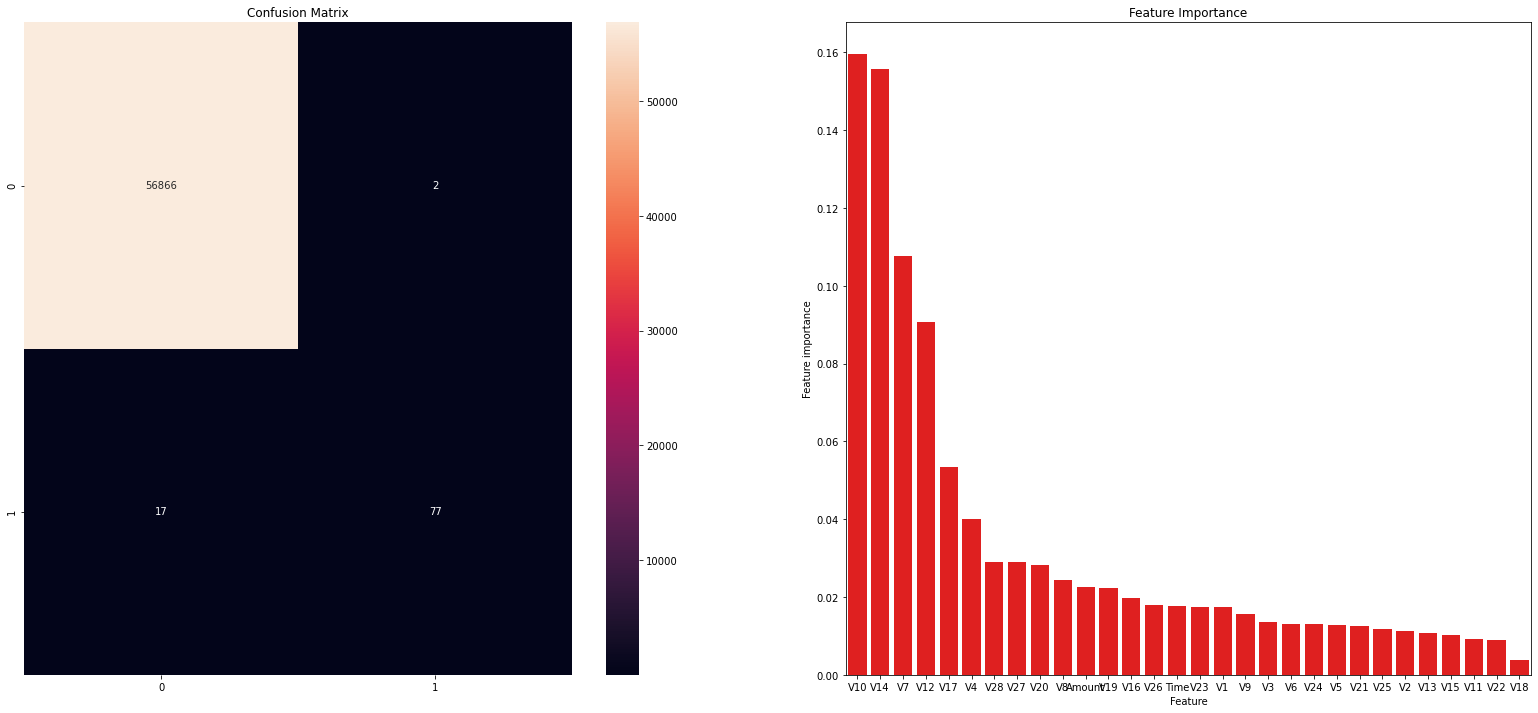

0.9996664442961974

In [103]:
predict2(xgb.XGBClassifier(silent=True,max_depth=2,tree_method = 'gpu_hist',predictor='gpu_predictor',eval_metric='auc'),X_train,X_test, y_train, y_test)

[[56867     1]
 [   18    76]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.99      0.81      0.89        94

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962

0.9042465268580169


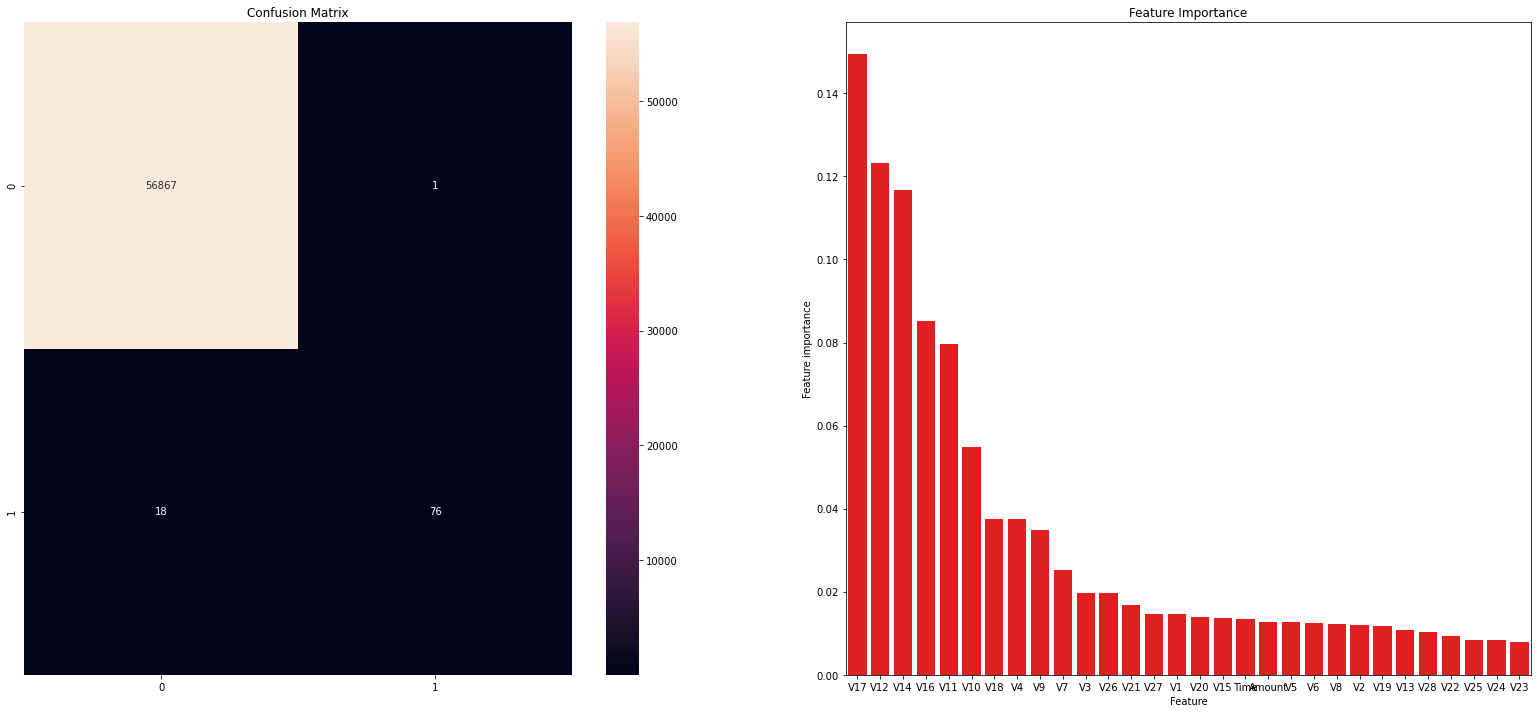

0.9996664442961974

In [104]:
predict2(RandomForestClassifier(n_estimators=100,n_jobs=4,verbose=False),X_train,X_test, y_train, y_test)

[[56857    11]
 [   19    75]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.87      0.80      0.83        94

    accuracy                           1.00     56962
   macro avg       0.94      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962

0.8988394550126534


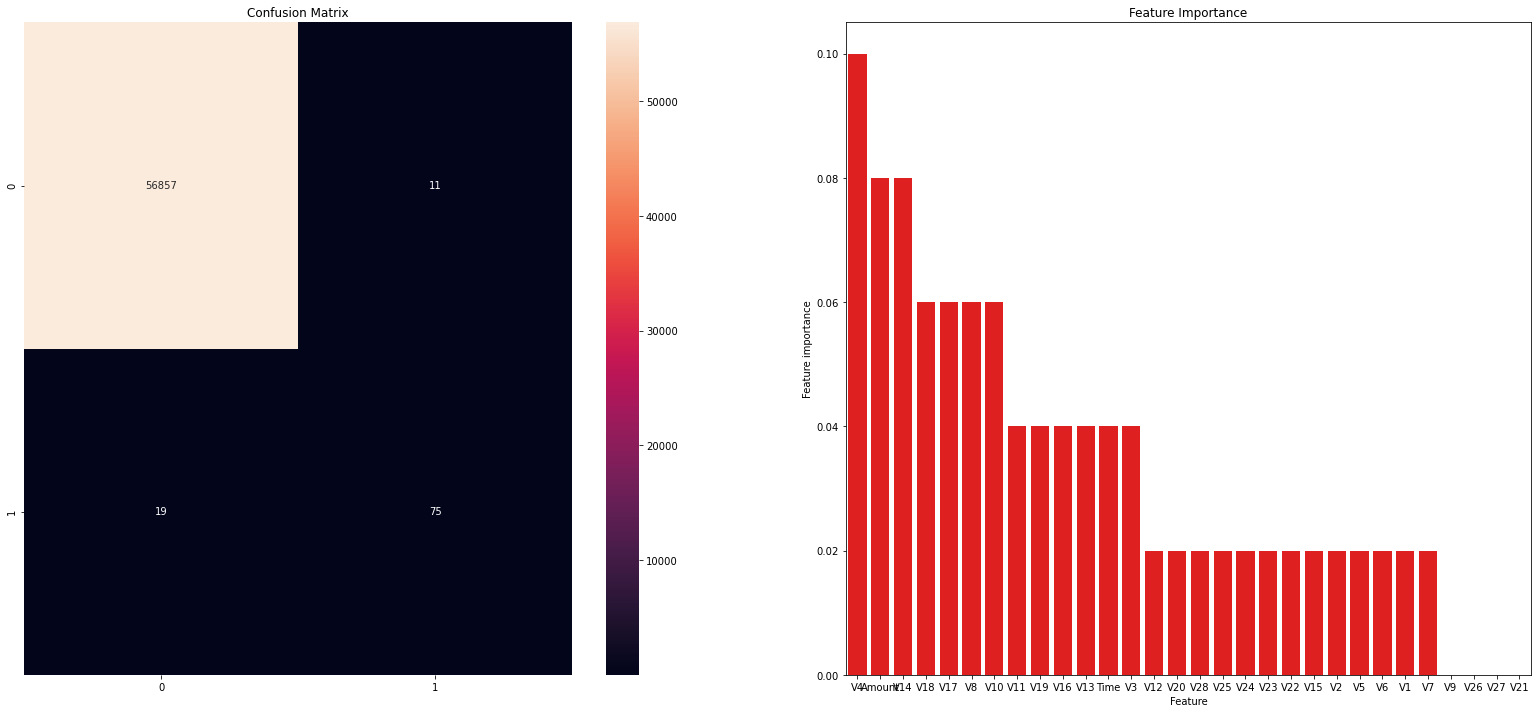

0.9994733330992591

In [105]:
predict2(AdaBoostClassifier(random_state=42,
                        algorithm='SAMME.R',
                         learning_rate=0.8,),X_train,X_test, y_train, y_test)

[[56853    15]
 [   30    64]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.81      0.68      0.74        94

    accuracy                           1.00     56962
   macro avg       0.90      0.84      0.87     56962
weighted avg       1.00      1.00      1.00     56962

0.8402936475511038


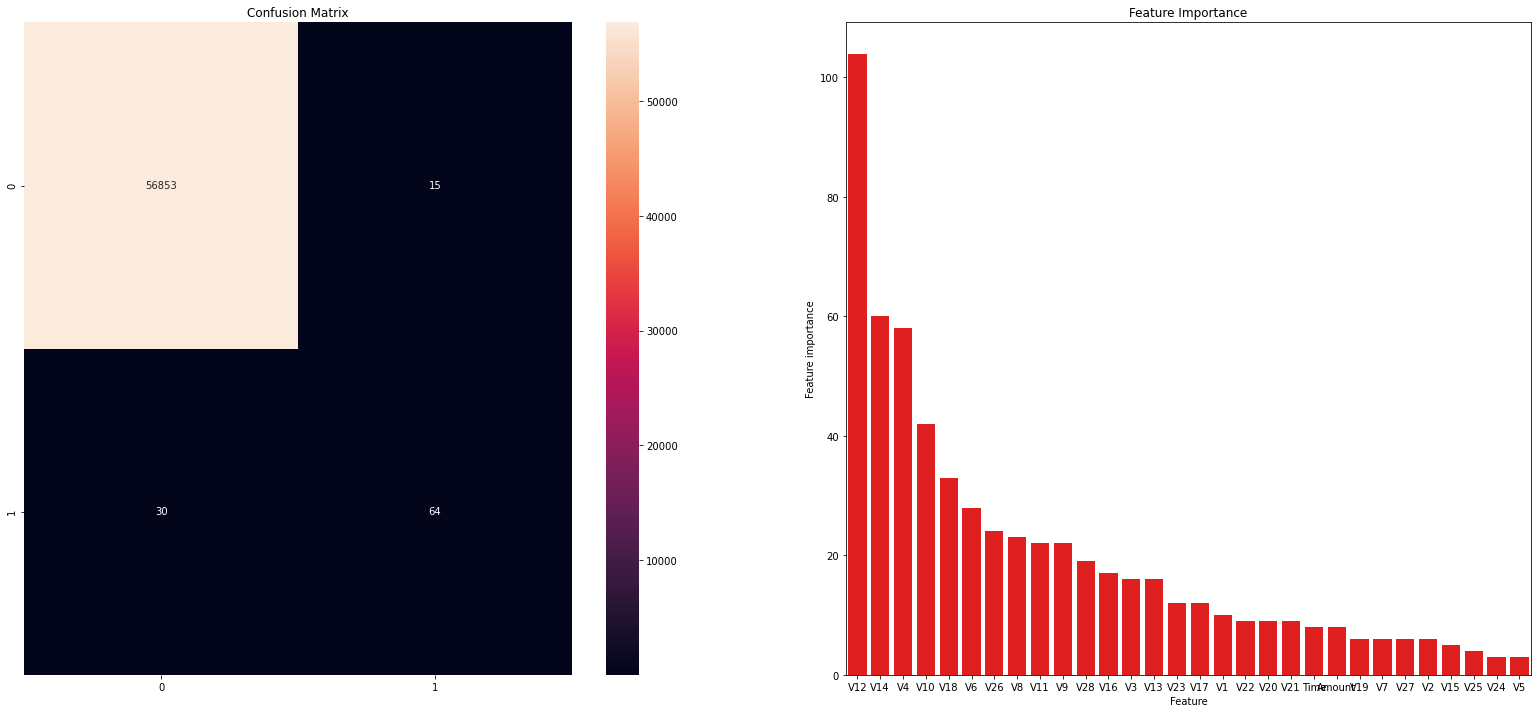

0.9992099996488887

In [106]:
predict2(lgb.LGBMClassifier(
    objective='binary',
        metric = 'auc',
          learning_rate= 0.05,
          num_leaves =  7,max_depth=4,min_child_samples= 100,  
          max_bin=100,device= 'gpu'),X_train,X_test, y_train, y_test)

now le'ts try same after sampling


In [107]:
smt = SMOTE(random_state=42)
# adasyn = ADASYN(random_state=42)
X_smote,Y_smote = smt.fit_resample(X_train,y_train)

In [108]:
predict(LogisticRegression(), X_smote, X_test, Y_smote, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[55406  1462]
 [    8    86]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56868
           1       0.06      0.91      0.10        94

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.97      0.99     56962

0.9445924791865895


0.9741933218636986

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:52:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[[56354   514]
 [   12    82]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56868
           1       0.14      0.87      0.24        94

    accuracy                           0.99     56962
   macro avg       0.57      0.93      0.62     56962
weighted avg       1.00      0.99      0.99     56962

0.931650975233426


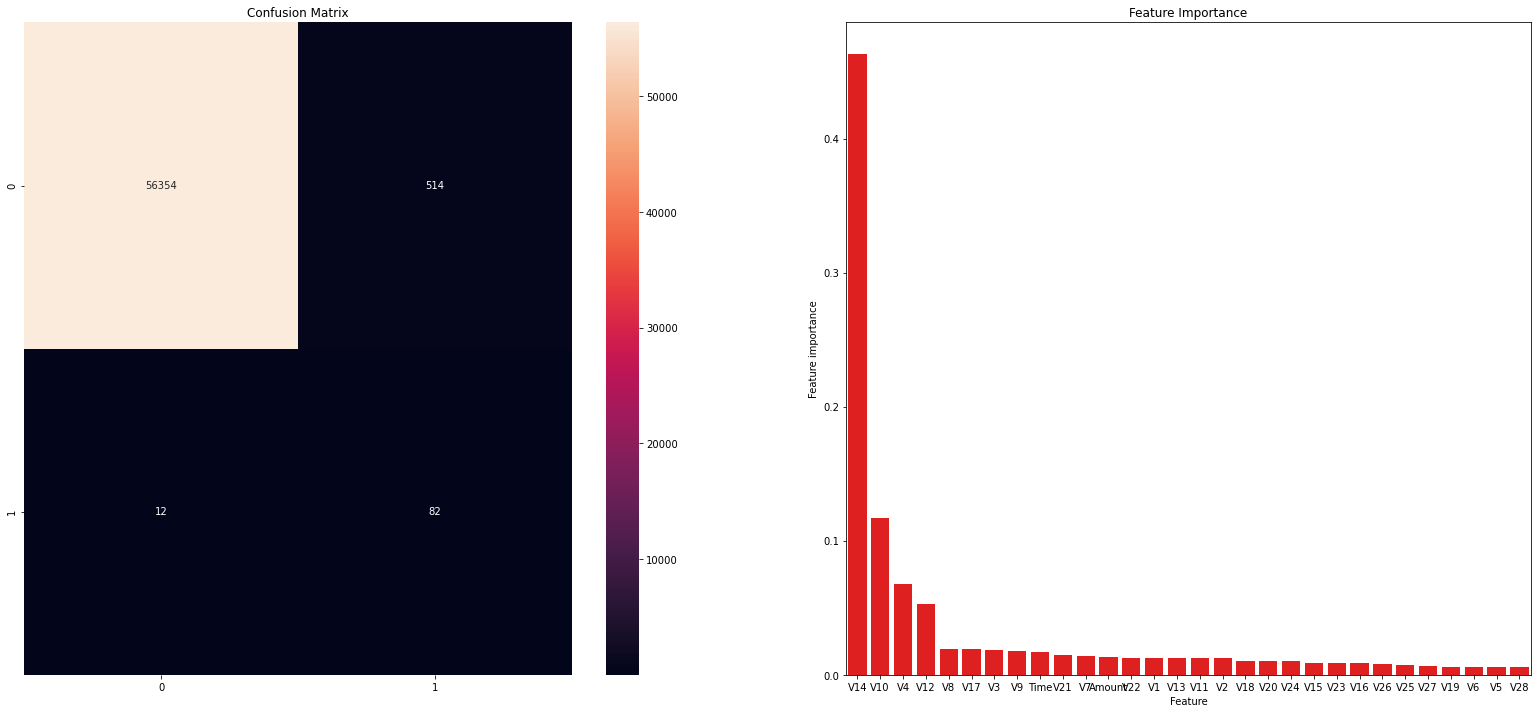

0.9907657736736772

In [109]:
predict2(xgb.XGBClassifier(silent=True,max_depth=2,tree_method = 'gpu_hist',predictor='gpu_predictor',eval_metric='auc'),X_smote,X_test, Y_smote, y_test)

[[56860     8]
 [   17    77]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.91      0.82      0.86        94

    accuracy                           1.00     56962
   macro avg       0.95      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962

0.9095041297577517


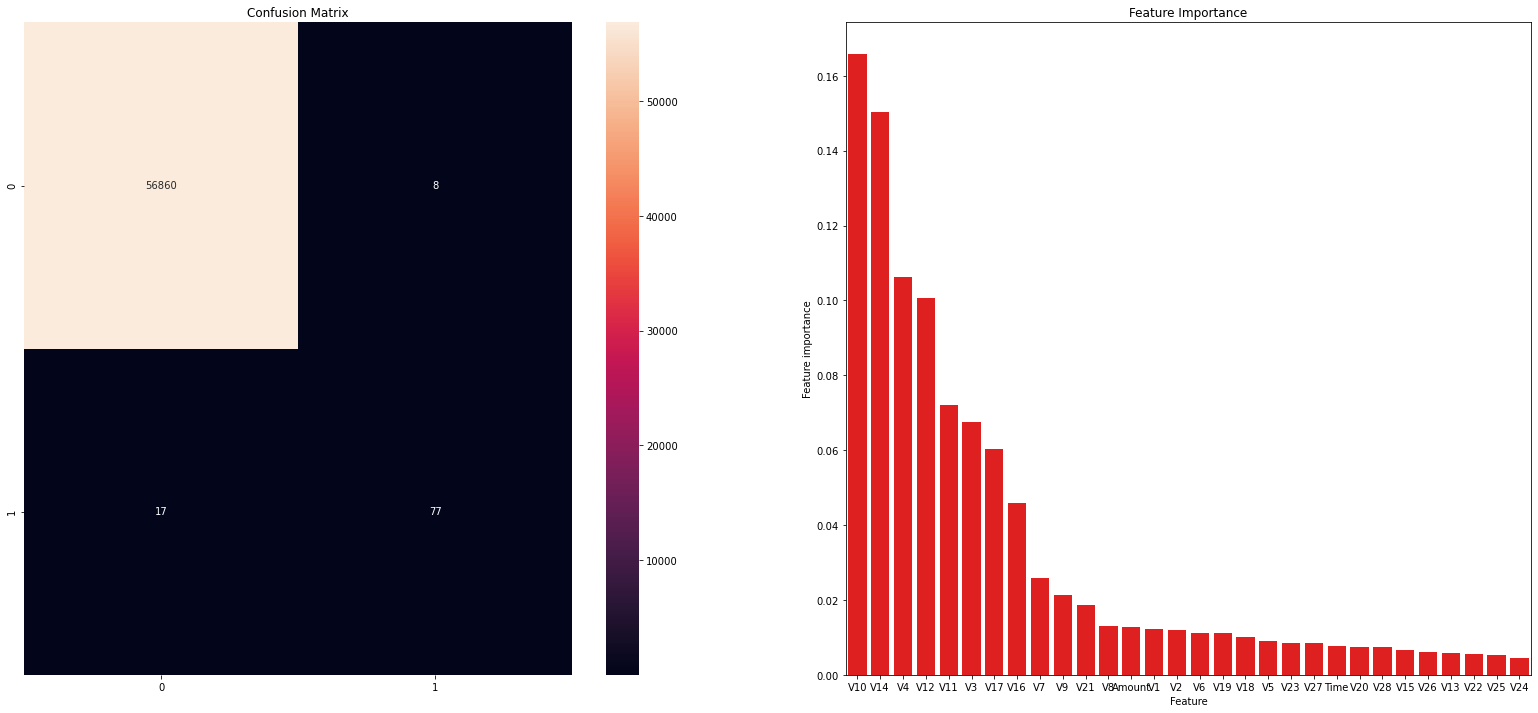

0.9995611109160493

In [110]:
predict2(RandomForestClassifier(n_estimators=100,n_jobs=4,verbose=False),X_smote,X_test, Y_smote, y_test)

[[55579  1289]
 [   11    83]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56868
           1       0.06      0.88      0.11        94

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962

0.9301560987071217


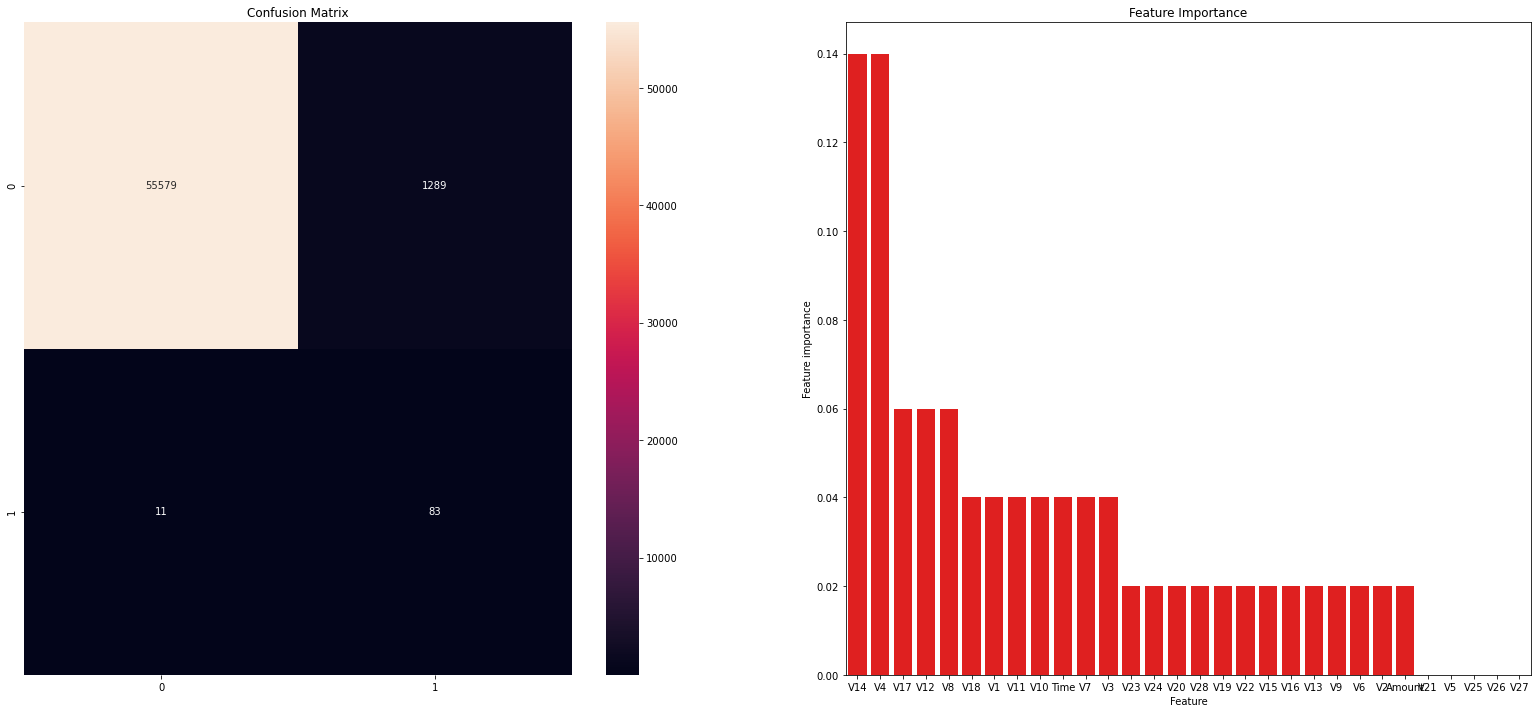

0.9771777676345634

In [111]:
predict2(AdaBoostClassifier(random_state=42,
                        algorithm='SAMME.R',
                         learning_rate=0.8,),X_smote,X_test, Y_smote, y_test)

[[55843  1025]
 [    9    85]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56868
           1       0.08      0.90      0.14        94

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.57     56962
weighted avg       1.00      0.98      0.99     56962

0.9431155613821631


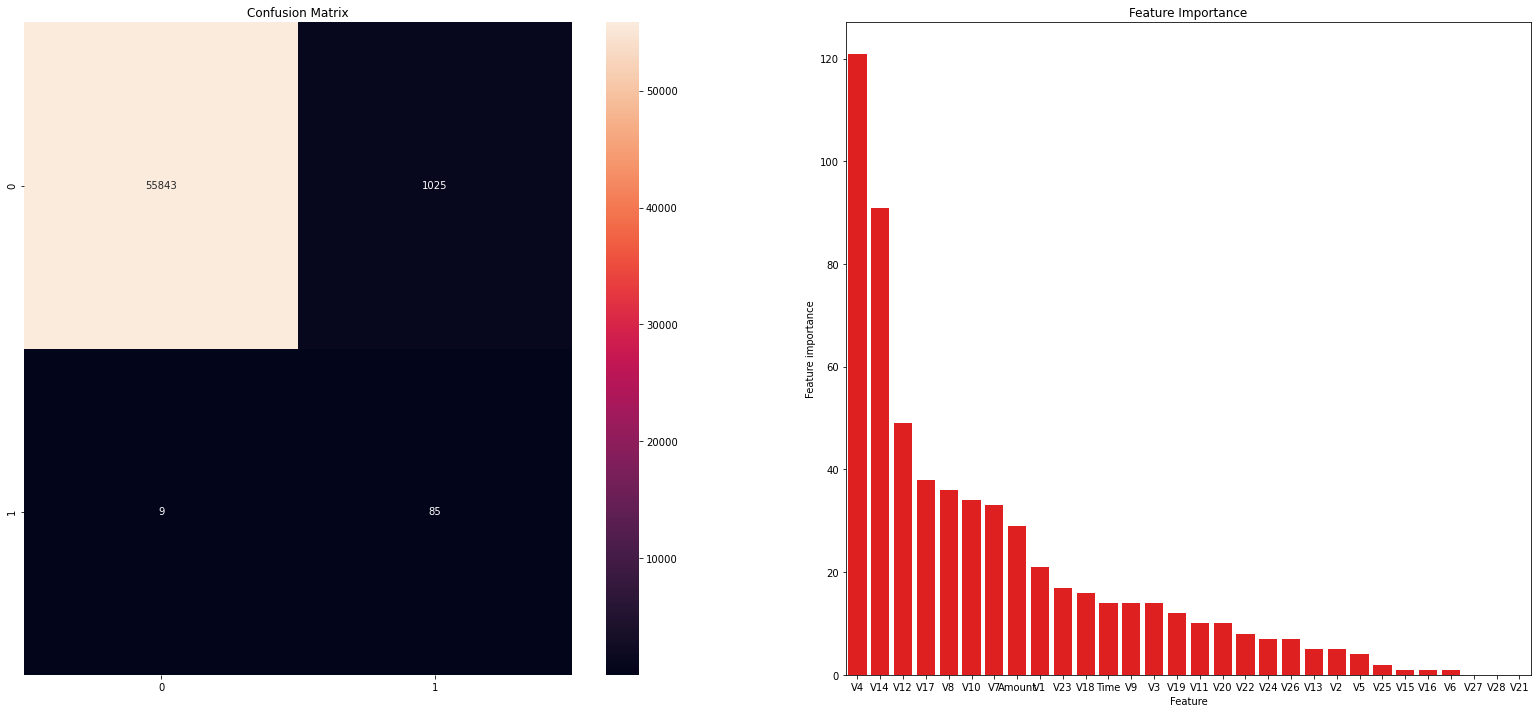

0.9818475474877989

In [113]:
predict2(lgb.LGBMClassifier(
    objective='binary',
        metric = 'auc',
          learning_rate= 0.05,
          num_leaves =  7,max_depth=4,min_child_samples= 100,  
          max_bin=100,device= 'gpu'),X_smote,X_test, Y_smote, y_test)

now let's try some feature selection to see if we can improve it a bit further using xgb

fun thing is all plots are showing that Amount really has small importance which is quite interesting but mostly it depends on 
V14, V10 , v4 and v17 in few cases


In [145]:
model =xgb.XGBClassifier(silent=True,max_depth=2,tree_method = 'gpu_hist',predictor='gpu_predictor',eval_metric='auc')

In [146]:
model.fit(X_smote,Y_smote)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:11:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, gpu_id=0, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='gpu_predictor', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, silent=True,
              subsample=1, tree_method='gpu_hist', validate_parameters=1,
              verbosity=None)

In [117]:
slm = SelectFromModel(model, threshold = 0.2)

In [126]:
X_train_XGB =slm.fit_transform(X_smote,Y_smote)

[18:05:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [127]:
#need to select same features as train dataset
X_test_XGB= np.array(X_test[X_test.columns[slm.get_support()]])

In [128]:
X_train_XGB

array([[ -0.0694688 ],
       [ -0.87780134],
       [ -0.77346466],
       ...,
       [ -1.74622822],
       [ -4.28410462],
       [-13.43101905]])

In [129]:
#preparing the train and test datasets
d_train= xgb.DMatrix(pd.DataFrame(X_train_XGB), Y_smote)
d_test= xgb.DMatrix(pd.DataFrame(X_test_XGB),y_test)

##to monitor train and  test
watch_list= [(d_train,'train'), (d_test, 'test')]

In [131]:
params = {}
params['objective'] = 'binary:logistic'
params['silent'] = True
params['max_depth'] = 2
params['eval_metric'] = 'auc'
params['random_state'] = 50
params['tree_method'] = 'gpu_hist'
params['predictor']='gpu_predictor'


In [147]:
model1 = xgb.train(params,d_train,200, watch_list)

[18:11:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.94969	test-auc:0.95638
[1]	train-auc:0.95110	test-auc:0.96450
[2]	train-auc:0.95163	test-auc:0.96486
[3]	train-auc:0.95188	test-auc:0.96541
[4]	train-auc:0.95218	test-auc:0.96542
[5]	train-auc:0.95420	test-auc:0.96714
[6]	train-auc:0.95422	test-auc:0.96731
[7]	train-auc:0.95451	test-auc:0.96783
[8]	train-auc:0.95616	test-auc:0.96359
[9]	train-auc:0.95616	test-auc:0.96351
[10]	train-auc:0.95617	test-auc:0.96351
[11]	train-auc:0.95630	test-auc:0.96364
[12]	train-auc:0.95630	test-auc:0.96364
[13]	train-auc:0.95631	test-auc:0.96367
[14]	train-auc:0.95631	test-auc:0.96367
[15]	train-auc:0.95651	t

[194]	train-auc:0.95867	test-auc:0.96281
[195]	train-auc:0.95867	test-auc:0.96281
[196]	train-auc:0.95867	test-auc:0.96281
[197]	train-auc:0.95867	test-auc:0.96281
[198]	train-auc:0.95867	test-auc:0.96281
[199]	train-auc:0.95867	test-auc:0.96281


In [148]:
preds=model1.predict(d_test)

<AxesSubplot:title={'center':'Feature importance '}, xlabel='F score', ylabel='Features'>

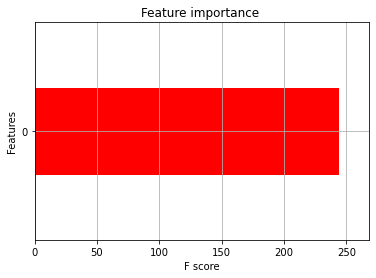

In [149]:
xgb.plot_importance(model1, height=0.8, title="Feature importance ",color='red',show_values=False)

In [150]:
roc_auc_score(y_test ,preds)

0.9628147827219136